In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [9]:
df = pd.read_csv('output.csv', index_col=0)
df.head()

,state,2019population,positive,hospitalizedCumulative,death,totalTestResults,infection_rate,death_rate,test_rate,hospitalized_rate,infection_rank,death_rank,test_rank,final_score
1,Vermont,623989.0,16083.0,NaN,208.0,1124215.0,0.025774,0.012933,1.801658,NaN,lowest25%,lowest25%,top25%,300
2,Minnesota,5639632.0,490011.0,25978.0,6550.0,7111428.0,0.086887,0.013367,1.260974,0.053015,50%-75%,lowest25%,top25%,275
3,Alaska,731545.0,56886.0,1293.0,305.0,1731628.0,0.077761,0.005362,2.367083,0.022730,50%-75%,lowest25%,top25%,275
4,Colorado,5758736.0,436602.0,23904.0,5989.0,6415123.0,0.075816,0.013717,1.113981,0.054750,50%-75%,lowest25%,25%-50%,250
5,New Hampshire,1359711.0,76861.0,1131.0,1184.0,1497185.0,0.056527,0.015404,1.101105,0.014715,lowest25%,50%-75%,25%-50%,250


In [14]:
model = smf.ols('death ~ test_rate + positive + final_score', data = df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  death   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     268.0
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           5.69e-30
Time:                        18:02:24   Log-Likelihood:                -485.26
No. Observations:                  52   AIC:                             978.5
Df Residuals:                      48   BIC:                             986.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2524.8615   1773.882      1.423      0.161   -1041.768    6091.491
test_rate    2384.9830    848.127      2.812      0.007     679.709    4090.257
positive        0.0170      0.001     27.873      0.000       0.016       0.018
final_score   -25.2307     10.110     -2.496      0.016     -45.559      -4.903
==============================================================================
Omnibus:                       18.436   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.601
Skew:                           1.196   Prob(JB):                     1.67e-06
Kurtosis:                       5.560   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

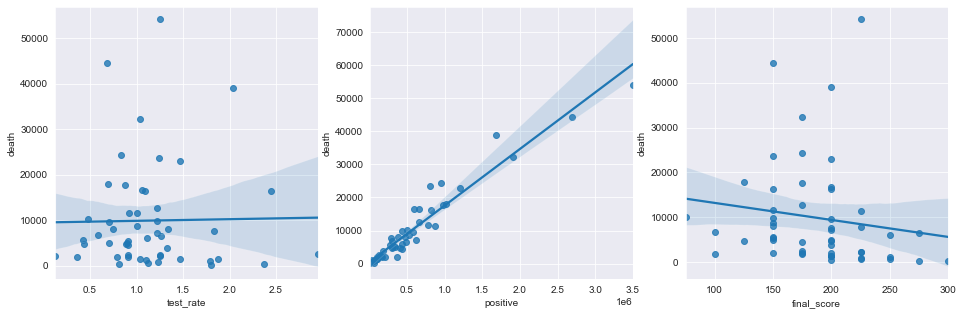

In [15]:
plt.figure(figsize=(16,5))

#subplot(nrows, ncols, index)
plt.subplot(1, 3, 1)
sns.regplot(x="test_rate", y="death", data=df)

plt.subplot(1, 3, 2)
sns.regplot(x="positive", y="death", data=df) 

plt.subplot(1, 3, 3)
sns.regplot(x="final_score", y="death", data=df)
plt.show()

In [51]:
# The difference between Red and Blue state (distinguished by its vote for the presidential election in 2020)

In [141]:
state= {
    'Alabama': 'Trump',
    'Alaska': 'Trump',
    'American Samoa':'Biden',
    'Arizona':'Biden',
    'Arkansas':'Trump',
    'California':'Biden',
    'Colorado':'Biden',
    'Connecticut':'Biden',
    'Delaware':'Biden',
    'District of Columbia':'Biden',
    'Florida':'Trump',
    'Georgia':'Biden',
    'Guam':'Biden',
    'Hawaii':'Biden',
    'Idaho':'Trump',
    'Illinois':'Biden',
    'Indiana':'Trump',
    'Iowa':'Trump',
    'Kansas':'Trump',
    'Kentucky':'Trump',
    'Louisiana':'Trump',
    'Maine':'Biden',
    'Maryland':'Biden',
    'Massachusetts':'Biden',
    'Michigan':'Biden',
    'Minnesota':'Biden',
    'Mississippi':'Trump',
    'Missouri':'Trump',
    'Montana':'Trump',
    'Nebraska':'Trump',
    'Nevada':'Biden',
    'New Hampshire':'Biden',
    'New Jersey':'Biden',
    'New Mexico':'Biden',
    'New York':'Biden',
    'North Carolina':'Biden',
    'North Dakota':'Trump',
    'Northern Mariana Islands':'Biden',
    'Ohio':'Trump',
    'Oklahoma':'Trump',
    'Oregon':'Biden',
    'Pennsylvania':'Biden',
    'Puerto Rico':'Biden',
    'Rhode Island':'Biden',
    'South Carolina':'Trump',
    'South Dakota':'Trump',
    'Tennessee':'Trump',
    'Texas':'Trump',
    'Utah':'Trump',
    'Vermont':'Biden',
    'Virgin Islands':'Biden',
    'Virginia':'Biden',
    'Washington':'Biden',
    'West Virginia':'Trump',
    'Wisconsin':'Biden',
    'Wyoming':'Trump'
    }
politics = pd.Series(state, index = state.keys(), name='vote')
x = pd.merge(df, politics, left_on='state', right_on=politics.index)
x.groupby('vote').agg({'final_score':np.mean})

,final_score
vote,
Biden,204.464286
Trump,167.708333


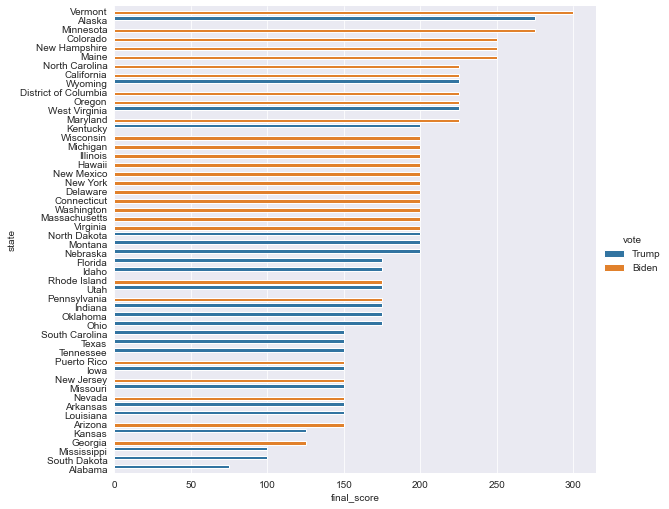

In [139]:
agg_df = x.groupby(['vote','state']).agg({'final_score':np.mean}).reset_index()
agg_df['state']=agg_df['state'].astype('category')
agg_df = agg_df.sort_values(by=['final_score'])
g = sns.catplot(x="final_score", y="state",hue="vote",data=agg_df, kind="bar",\
    order = agg_df.sort_values(by=['final_score'],ascending=False).state, height=7, aspect=1.2)